<div class="alert alert-block alert-info" align="center" style="padding: 10px;">
<h1><b><u>Dimensionality Reduction-4</u></b></h1>
</div>

# Objective:

The objective of this assignment is to implement PCA on a given dataset and analyze the results.

## Instructions:

1. Download the wine dataset from the UCI Machine Learning Repository [Wine Dataset](https://archive.ics.uci.edu/ml/datasets/Wine).
2. Load the dataset into a Pandas dataframe.
3. Split the dataset into features and target variables.
4. Perform data preprocessing (e.g., scaling, normalization, missing value imputation) as necessary.
5. Implement PCA on the preprocessed dataset using the scikit-learn library.
6. Determine the optimal number of principal components to retain based on the explained variance ratio.
7. Visualize the results of PCA using a scatter plot.
8. Perform clustering on the PCA-transformed data using the K-Means clustering algorithm.
9. Interpret the results of PCA and clustering analysis.

## Deliverables:

- Jupyter notebook containing the code for the PCA implementation.
- A report summarizing the results of PCA and clustering analysis.
- Scatter plot showing the results of PCA.
- A table showing the performance metrics for the clustering algorithm.

## Additional Information:

- You can use the Python programming language.
- You can use any other machine learning libraries or tools as necessary.
- You can use any visualization libraries or tools as necessary.

In [78]:
import pandas as pd

# Create a Pandas DataFrame using the data and feature names from the loaded dataset
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)

# Add the target variable to the DataFrame
wine_df['target'] = wine.target

wine_df.head()

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280%2FOD315_of_diluted_wines,Proline,target
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [79]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Alcohol                         178 non-null    float64 
 1   Malic_acid                      178 non-null    float64 
 2   Ash                             178 non-null    float64 
 3   Alcalinity_of_ash               178 non-null    float64 
 4   Magnesium                       178 non-null    int64   
 5   Total_phenols                   178 non-null    float64 
 6   Flavanoids                      178 non-null    float64 
 7   Nonflavanoid_phenols            178 non-null    float64 
 8   Proanthocyanins                 178 non-null    float64 
 9   Color_intensity                 178 non-null    float64 
 10  Hue                             178 non-null    float64 
 11  OD280%2FOD315_of_diluted_wines  178 non-null    float64 
 12  Proline               

In [80]:
wine_df.duplicated().sum()

0

In [81]:
wine_df.isnull().sum()

Alcohol                           0
Malic_acid                        0
Ash                               0
Alcalinity_of_ash                 0
Magnesium                         0
Total_phenols                     0
Flavanoids                        0
Nonflavanoid_phenols              0
Proanthocyanins                   0
Color_intensity                   0
Hue                               0
OD280%2FOD315_of_diluted_wines    0
Proline                           0
target                            0
dtype: int64

In [82]:
wine_df.shape

(178, 14)

In [83]:
wine_df["target"] = wine_df["target"].astype(int)

In [84]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Alcohol                         178 non-null    float64
 1   Malic_acid                      178 non-null    float64
 2   Ash                             178 non-null    float64
 3   Alcalinity_of_ash               178 non-null    float64
 4   Magnesium                       178 non-null    int64  
 5   Total_phenols                   178 non-null    float64
 6   Flavanoids                      178 non-null    float64
 7   Nonflavanoid_phenols            178 non-null    float64
 8   Proanthocyanins                 178 non-null    float64
 9   Color_intensity                 178 non-null    float64
 10  Hue                             178 non-null    float64
 11  OD280%2FOD315_of_diluted_wines  178 non-null    float64
 12  Proline                         178 

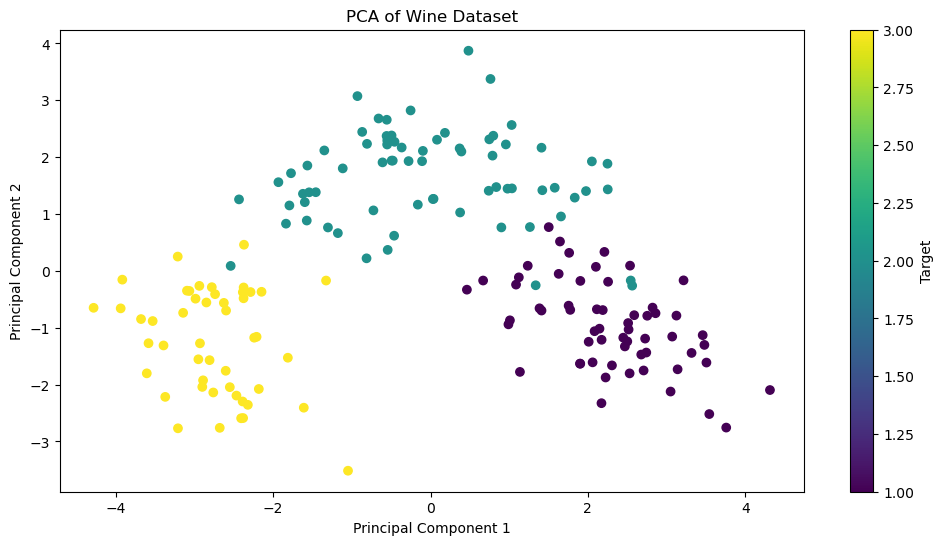

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Separate features (X) and target variable (y)
X = wine_df.drop(columns=['target'])
y = wine_df['target']

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize the Results of PCA
plt.figure(figsize=(12, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Wine Dataset')
plt.colorbar(label='Target')
plt.show()

**Visualization of PCA Results:-**

The scatter plot data is separated into three distinct clusters, which suggests that the PCA transformation has been able to capture the underlying structure of the data.

In [93]:
# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Print the explained variance ratio
print(explained_variance_ratio)

[0.36198848]


In [94]:
# Create a K-Means clustering model
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  

# Fit the KMeans model to the data
kmeans.fit(X_pca)

# Predict the cluster labels for each data point
y_pred = kmeans.predict(X_pca)

cluster_labels = kmeans.fit_predict(X_pca)
# Print cluster labels
print("Cluster Labels:")
print(cluster_labels)

Cluster Labels:
[2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2
 0 2 2 2 0 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 1 0 2 0 0 2 0 0 2 1 2 0 2
 2 0 0 1 2 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 2 0 0 2 2 0 0 0 0 0 1 0 1 0 2 2
 0 1 0 0 0 0 0 1 0 0 2 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
